In [16]:
from IPython.display import Audio
import librosa
import os

In [17]:
def cut_song(song):
    start = 0
    end = len(song)
    song_pieces = []
    while start + 100000 < end:
        song_pieces.append(song[start:start+100000])
        start += 100000
    return song_pieces

def prepare_song(song_path):
    list_matrices = []
    y,sr = librosa.load(song_path,sr=22050)
    song_pieces = cut_song(y)
    for song_piece in song_pieces:
        melspec = librosa.feature.melspectrogram(song_piece)
        list_matrices.append(melspec)
    return list_matrices

In [18]:
all_tracks = []
genre = []
directory = 'C:\\Users\\Morten\\Desktop\\School\\Bachelor\\ModelFirstTry\\Podcasts\\ads'

for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([0]*len(song_pieces))
    print(f"Finished: {song_name}")

directory = 'C:\\Users\\Morten\\Desktop\\School\\Bachelor\\ModelFirstTry\\Podcasts\\noads'
for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([1]*len(song_pieces))
    print(f"Finished: {song_name}")

C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Finished: -nor-bbcfood-BBC Good Food Christmas Quiz 2021.mp3
Finished: -nor-bbcfood-BONUS COOKALONG  Choleh Bhatureh.mp3
Finished: -nor-bbcfood-BONUS COOKALONG - Next level chocolate ice cream.mp3
Finished: -nor-bbcfood-BONUS COOKALONG – Berry brownie pavlova cake.mp3
Finished: -nor-bbcfood-BONUS COOKALONG – Crispy sage and lemon roast chicken.mp3
Finished: -nor-dndisfornerds-Chult S03E24 A Good Meal.mp3
Finished: -nor-dndisfornerds-Chult S03E25 The Return of the King.mp3
Finished: -nor-dndisfornerds-Chult S03E26 Wishful Dilemmas.mp3
Finished: -nor-dndisfornerds-Fall from Grace 3 - The Dungeon - E01 Call to Adventure.mp3
Finished: -nor-dndisfornerds-Fall from Grace 3 - The Dungeon - E02 Your Typical Heroes.mp3
Finished: -nor-vicegaming-Episode 377 - I'm the Meanest Dog Around, Woof Woof!.mp3
Finished: -nor-vicegaming-Episode 378 - Intrusive Thought Hero.mp3
Finished: -nor-vicegaming-Episode 390 - It’s Got Good Hackerfeel.mp3


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks),
                                                    np.array(genre),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)


(2435, 128, 196)
(600, 128, 196)
(600, 128, 196)
(2435, 128, 196, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 196, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 194, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 97, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 95, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 45, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 80640)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
77/77 [==============================] - 41s 534ms/step - loss: 0.0383 - accuracy: 0.9971 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
77/77 [==============================] - 40s 519ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
77/77 [==============================] - 41s 529ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
77/77 [==============================] - 41s 538ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
77/77 [==============================] - 42s 544ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
77/77 [==============================] - 42s 544ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
77/77 [==============================] - 42s 549ms/step - loss: 0.0000e+00 - accuracy: 

9/9 - 1s - loss: 0.0000e+00 - accuracy: 1.0000


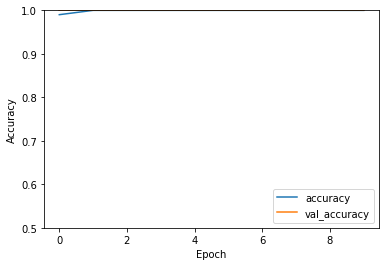

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)